# AI Natural Language Processing Notebook
In this notebook, I have documented some of my Natural language Processing problems and their codes. 

## Hangman Problem

Imagine a game where we have to guess a word **w** one letter at a time. So each letter you guess, you'll be told whether the letter appears in the word and also where it appears. Given the evidence that you have at any stage in this game, the critical question is what letter to guess next. 

We will find the probability that any remaining letter exists in the word, at each stage to assist the user to make best prediction. We will use concepts like conditionalized Bayes Rule, posterior probability to make the prediction. Our probabilities will be based on a corpus provided with this notebook.

The maximum chances allowed for a user is 10 to guess the whole word.

**Dataset:** List of all words with their count in corpus (large text corpus of Wall Street Journal articles)
e.g: 
ABANDONED 2107
ABATEMENT 110
ABBENHAUS 18
ABBEVILLE 12 
.....

### Approach

- We will first create a dictionary of all the words and calculate probability of each word. This probability will be a simple probability N(occurences)/N(Total Words). This probability is our prior probability. The dictionary will act as sample space.
- We then set a random word as input. We have used *random* library from python. Print the length of the word for the user. _num_ = answer length.
- Guess Loop:
    - Configure another dictionary - *newdict* which will be a subset of the sample space. we will update it as follows:
        - Remove those words from *newdict* that don't have same number of letters as the answer 
        - Remove those words from *newdict* that don't have correctly guessed letter in that position
        - Remove those words from *newdict* that have correctly guessed letter in some other incorrect position
        - Remove those words from *newdict* that have incorrectly guessed letters anywhere
    - Update the probability based on the *newdict* dictionary. This will be posterior probability which we are calculating based on new evidence (which is updated *newdicts*). This is simple application of Bayes Rule.
    - Show a barplot for better visualization
    - Recommend next letter based on which one has highest probability.
    - Ask for next guess
    - Terminating condition: Terminate if: **_num_ incorrect guesses** or **entire word is correctly guessed**

Guess the following 9 letter word
_________
The probabilities of each letter to be the next guess are:


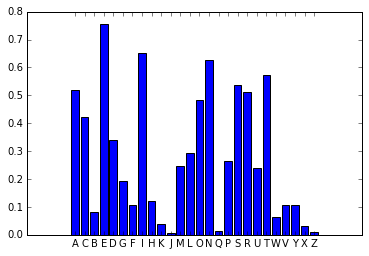

Next best guess is E with probability:  0.756778970408
Enter your guess: e
Correct Guesses: _____E___
List of Incorrect Guesses: []
Incorrect Guesses Remaining: 9
_________________________________________
The probabilities of each letter to be the next guess are:


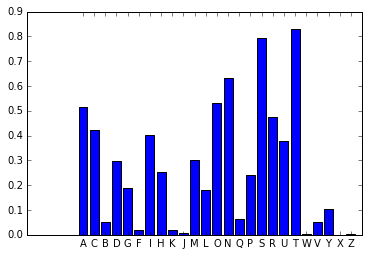

Next best guess is T with probability:  0.831423362417
Enter your guess: t
Correct Guesses: _____E___
List of Incorrect Guesses: ['T']
Incorrect Guesses Remaining: 8
_________________________________________
The probabilities of each letter to be the next guess are:


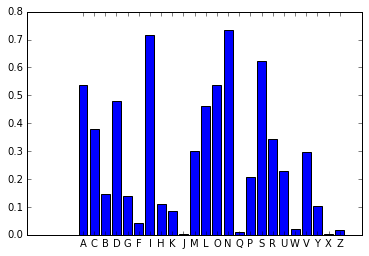

Next best guess is N with probability:  0.73490408137
Enter your guess: n
Correct Guesses: _____E__N
List of Incorrect Guesses: ['T']
Incorrect Guesses Remaining: 8
_________________________________________
The probabilities of each letter to be the next guess are:


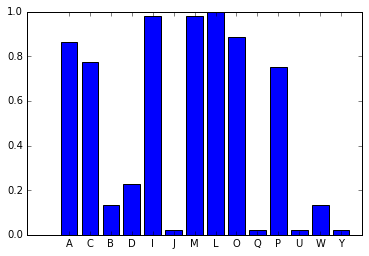

Next best guess is L with probability:  1.0
Enter your guess: l
Correct Guesses: ____LE__N
List of Incorrect Guesses: ['T']
Incorrect Guesses Remaining: 8
_________________________________________
The probabilities of each letter to be the next guess are:


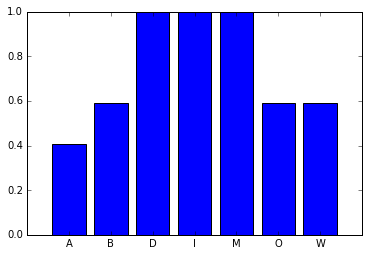

Next best guess is M with probability:  1.0
Enter your guess: m
Correct Guesses: __M_LE__N
List of Incorrect Guesses: ['T']
Incorrect Guesses Remaining: 8
_________________________________________
The probabilities of each letter to be the next guess are:


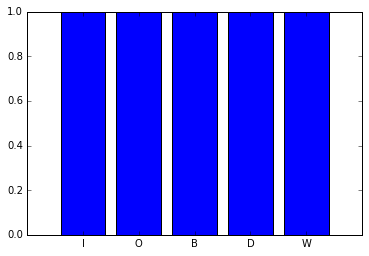

Next best guess is W with probability:  1.0
Enter your guess: w
Correct Guesses: W_M_LE__N
List of Incorrect Guesses: ['T']
Incorrect Guesses Remaining: 8
_________________________________________
The probabilities of each letter to be the next guess are:


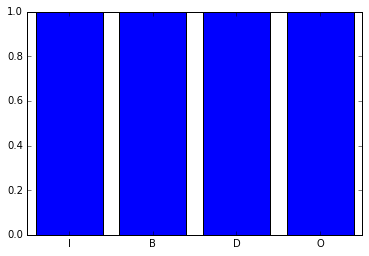

Next best guess is O with probability:  1.0
Enter your guess: o
Correct Guesses: W_M_LE_ON
List of Incorrect Guesses: ['T']
Incorrect Guesses Remaining: 8
_________________________________________
The probabilities of each letter to be the next guess are:


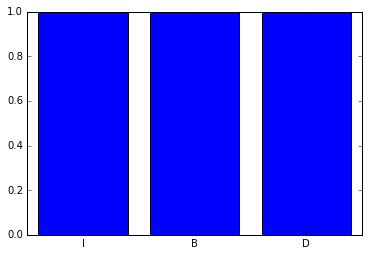

Next best guess is D with probability:  1.0
Enter your guess: d
Correct Guesses: W_M_LEDON
List of Incorrect Guesses: ['T']
Incorrect Guesses Remaining: 8
_________________________________________
The probabilities of each letter to be the next guess are:


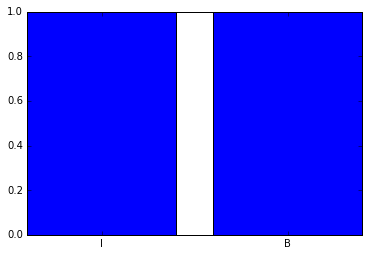

Next best guess is B with probability:  1.0
Enter your guess: b
Correct Guesses: W_MBLEDON
List of Incorrect Guesses: ['T']
Incorrect Guesses Remaining: 8
_________________________________________
The probabilities of each letter to be the next guess are:


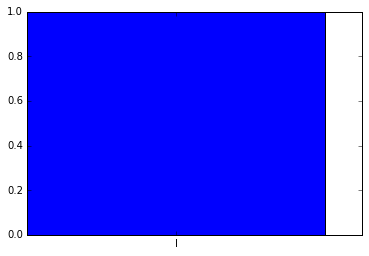

Next best guess is I with probability:  1.0
Enter your guess: i
Correct Guesses: WIMBLEDON
List of Incorrect Guesses: ['T']
Incorrect Guesses Remaining: 8
_________________________________________
You Win


In [3]:
# We will first select a word randomly from the corpus.
import random
# Enable graphics
import matplotlib.pyplot as plt
%matplotlib inline

# We will load the corpus of all nine letter words
f = open('corpus.txt','r')
a = f.readlines()

## Create a dictionary of all words
dicts={}
for i in a:
    if(i!='\n'):
        wordlength = len(i.split()[0])
        dicts[i[:wordlength]]=int(i[wordlength+1:-1])

    
## Setting a random word as answer
l=[]
w=[]
num = 0
freq_words=sorted(dicts.items(), key=lambda x: x[1])
guess_word = random.randrange(0,len(freq_words))
for i in freq_words[guess_word][0]:
    w.append(i)
    l.append('_')
    num = num+1

state = 1 #Define system State = 1 if it's not over State = 0 complete
incorrect_guess=[] #List of incorrectly guessed letters
max_incorrect = num #Maximum number of incorrect guesses allowed
chances = num
# List of correctly guessed letters
print "Guess the following",num,"letter word"
lstr = ''.join(map(str, l))
print lstr 

## Hangman Loop
while state==1:
    
    # PART A: Updating Dictionary
    newdict={}
    for i in dicts:
        newdict[i]=dicts[i]
        
    # Remove words which are not equal to word length
    for i in dicts:
        if(len(i)!=num):
            del newdict[i]
    
    # Remove: Words that don't have correctly guessed letter in that position
    count=0
    while count<num:
        if l[count] is not '_':
            for i in dicts:
                if l[count] != i[count] and i in newdict:
                    del newdict[i]
        count = count + 1
    dicts = {}

    for i in newdict:
        dicts[i]=newdict[i]

    # Remove: Words that have correctly guessed letter in some other incorrect position
    count = 0
    while count<num:
        if l[count] is not '_':
            for i in dicts:
                counter=0
                while counter<num:
                    if i[counter]==l[count] and i[counter]!=l[counter] and i in newdict:
                        del newdict[i]
                    counter=counter+1
        count = count+1

    dicts = {}
    for i in newdict:
        dicts[i]=newdict[i]

    # Remove: Words that have incorrectly guessed letters anywhere
    for i in incorrect_guess:
        for j in dicts:
            for k in j:
                if k == i and j in newdict:
                    del newdict[j]

    # PART B: Computing Probability
    total = 0
    dicts={}
    for i in newdict:
        dicts[i]=newdict[i]
    for i in dicts:
        total = total + dicts[i]
    for i in dicts:
        dicts[i]=float(dicts[i])/float(total)
    
    # Updating probability of every letter
    prob_letter = {}
    for i in dicts:
        word = []
        for j in i:
            if j not in word and j not in l and j not in incorrect_guess:
                if j in prob_letter:
                    prob_letter[j]=prob_letter[j]+dicts[i]
                else:
                    prob_letter[j]=dicts[i]
            word.append(j)

    # Sorting alphabets in increasing order of probability
    sorted_prob_letter=sorted(prob_letter.items(), key=lambda x: x[1])
    plt.bar(range(len(prob_letter)), prob_letter.values(), align='center')
    plt.xticks(range(len(prob_letter)), prob_letter.keys())
    print "The probabilities of each letter to be the next guess are:"
    plt.show()
    print "Next best guess is",sorted_prob_letter[-1:][0][0],\
    "with probability: ",sorted_prob_letter[-1:][0][1]

    #Getting input from user
    nextChar=raw_input("Enter your guess: ")
    nextChar= str.upper(nextChar)
    count = 0
    flag = 0


    #Terminating Condition
    for i in w:
        if nextChar == i:
            l[count]=nextChar
            flag = 1
        count = count + 1

    if flag == 0:
        incorrect_guess.append(nextChar)
        chances = chances-1

    lstr = ''.join(map(str, l))
    print "Correct Guesses:",lstr.strip(", ") 
    print "List of Incorrect Guesses:",str(incorrect_guess).strip("'")
    print "Incorrect Guesses Remaining:",chances
    print "_________________________________________"
    count = 0
    for i in l:
        if i != '_':
            count = count +1
    if count == num:
        print "You Win"
        state=0
    if len(incorrect_guess)==max_incorrect:
        print "10 incorrect guesses complete: You Lose"
        state=0
f.close()
## End Code